In [1]:
import sys 
import os
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import time

In [38]:
data_col_path = r'../data/variables/data-colombia-month-fill.zip'
data_cuenca_path = r'../data/variables/data-cuenca-month-fill.zip'
graph_cuenca_output = r'../explore/images/boxplot/monthly/cuenca-bp-mes-{etiqueta}-{cuenca}-fill.png'

cuencas = [27, 28, 30, 36, 42, 44]
cols_by_month = ['PTPM_CON_max', 'PTPM_CON_median', 'PTPM_CON_min', 'Q_MEDIA_D_median','Q_MN_D_min', 'Q_MX_D_max', 'TMN_CON_min', 'TMX_CON_max']
cols_simple = ['loss_cover_histo', 'loss_cover_fcl', 'loss_cover_fcl_perc', 'loss_cover_perc_acum']

In [3]:
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')
#dtypes = { 'cuenca':'category'}

In [33]:
def drawBoxPlot(df, cuenca, path, tipo):
    for etiqueta in df.columns:
        sns.set(rc={'figure.figsize':(8, 7)})
        
        fig, ax = plt.subplots()
        
        ax.set_title(f'{cuenca}-{etiqueta}')
        if tipo == 'M':
            sns.boxplot(x=df.index.month_name(), y=df[etiqueta])
        elif tipo == 'Y':
            sns.boxplot(x=df.index.year, y=df[etiqueta])
        else:
            sns.boxplot(df[etiqueta])
            
        plt.xticks(rotation=90)
            
        ##plt.setp(ax.get_xticklabels(), rotation=90)
        
        p = path.format(etiqueta = etiqueta, cuenca = cuenca)
        p = os.path.join(*p.split('/'))
        print(p)
        plt.savefig(p)
        

In [39]:
df = pd.read_csv(data_col_path, parse_dates = ['fecha'], date_parser = dateparse)
df.drop(columns=['anio', 'mes'], inplace=True)
df.set_index('fecha', inplace = True)
df.head()

,PTPM_CON_max,PTPM_CON_median,PTPM_CON_min,Q_MEDIA_D_median,Q_MN_D_min,Q_MX_D_max,TMN_CON_min,TMX_CON_max,loss_cover_histo,loss_cover_fcl,loss_cover_fcl_perc,loss_cover_perc_acum
fecha,,,,,,,,,,,,
2000-01-01,34.0,0.0,0.0,23.2850,13.4800,64.5850,11.95,24.775,NaN,NaN,NaN,NaN
2000-02-01,45.0,1.0,0.0,19.4850,7.7769,70.8585,12.40,26.200,NaN,NaN,NaN,NaN
2000-03-01,38.6,0.5,0.0,19.6350,14.3280,85.0000,12.00,24.900,NaN,NaN,NaN,NaN
2000-04-01,39.5,1.0,0.0,26.5625,13.6244,75.0000,13.30,25.600,NaN,NaN,NaN,NaN
2000-05-01,47.5,2.5,0.0,42.6350,14.3280,122.0000,13.15,25.400,NaN,NaN,NaN,NaN


..\explore\images\boxplot\monthly\cuenca-bp-mes-PTPM_CON_max-Colombia-fill.png
..\explore\images\boxplot\monthly\cuenca-bp-mes-PTPM_CON_median-Colombia-fill.png
..\explore\images\boxplot\monthly\cuenca-bp-mes-PTPM_CON_min-Colombia-fill.png
..\explore\images\boxplot\monthly\cuenca-bp-mes-Q_MEDIA_D_median-Colombia-fill.png
..\explore\images\boxplot\monthly\cuenca-bp-mes-Q_MN_D_min-Colombia-fill.png
..\explore\images\boxplot\monthly\cuenca-bp-mes-Q_MX_D_max-Colombia-fill.png
..\explore\images\boxplot\monthly\cuenca-bp-mes-TMN_CON_min-Colombia-fill.png
..\explore\images\boxplot\monthly\cuenca-bp-mes-TMX_CON_max-Colombia-fill.png


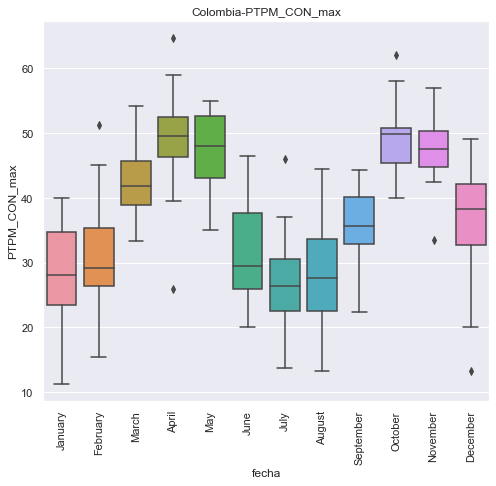

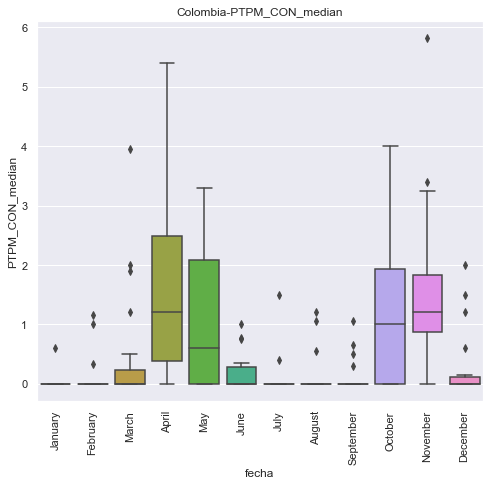

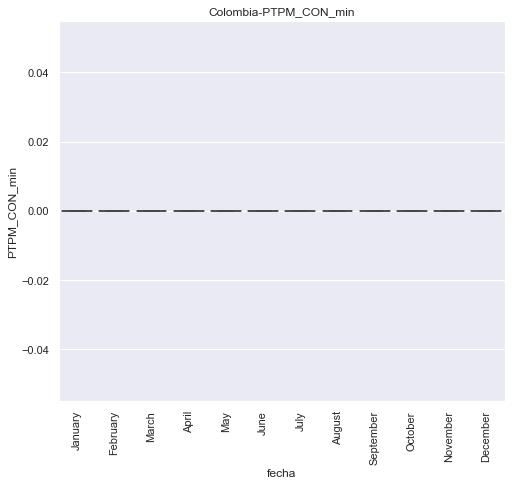

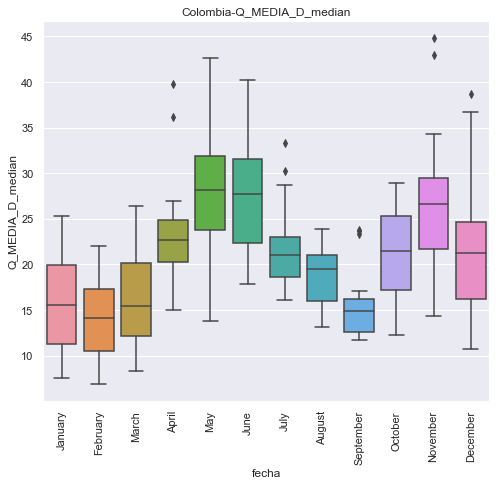

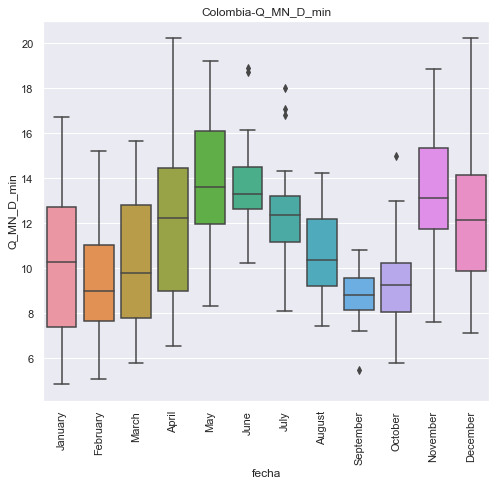

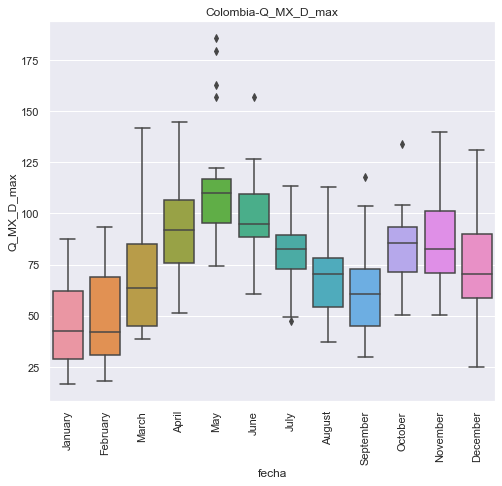

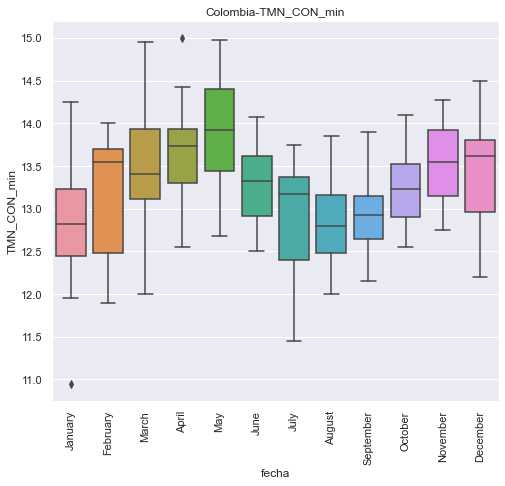

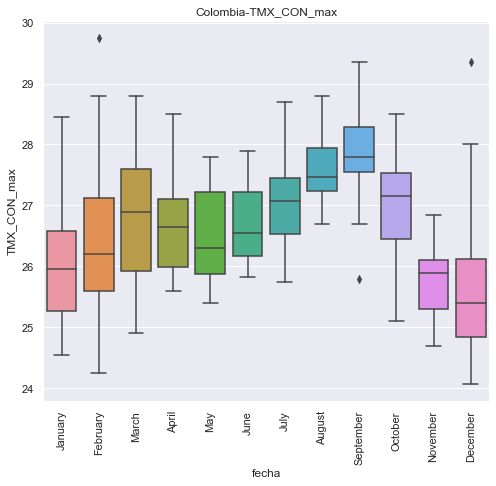

In [40]:
drawBoxPlot(df[cols_by_month], 'Colombia', graph_cuenca_output, 'M')

..\explore\images\boxplot\monthly\cuenca-bp-mes-loss_cover_histo-Colombia-fill.png
..\explore\images\boxplot\monthly\cuenca-bp-mes-loss_cover_fcl-Colombia-fill.png
..\explore\images\boxplot\monthly\cuenca-bp-mes-loss_cover_fcl_perc-Colombia-fill.png
..\explore\images\boxplot\monthly\cuenca-bp-mes-loss_cover_perc_acum-Colombia-fill.png


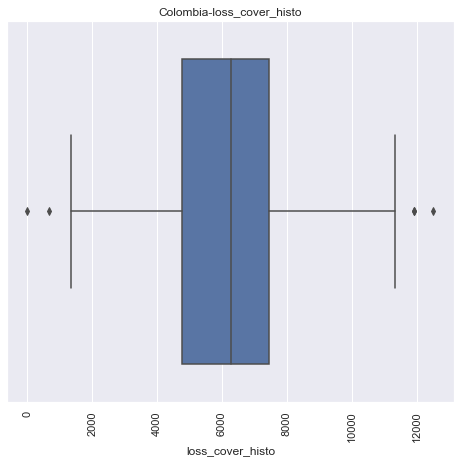

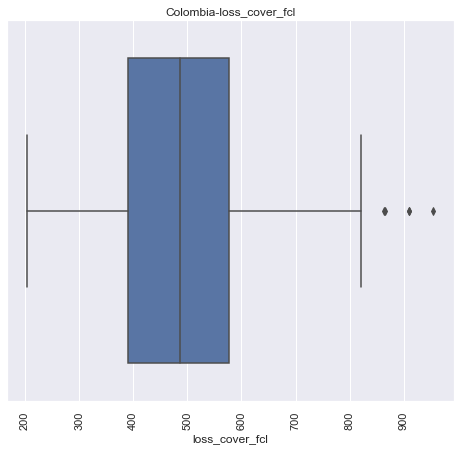

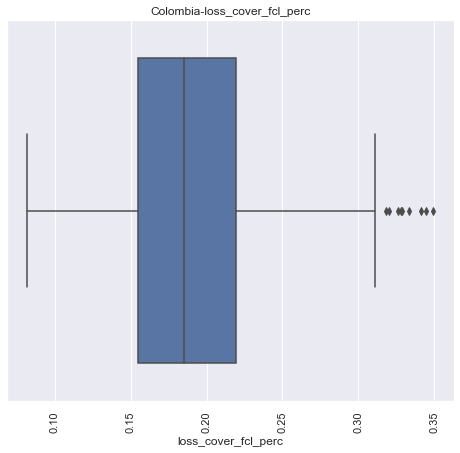

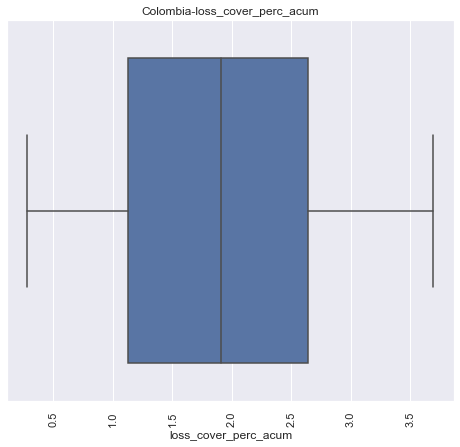

In [41]:
drawBoxPlot(df[cols_simple], 'Colombia', graph_cuenca_output, '')

In [36]:
df = pd.read_csv(data_cuenca_path, parse_dates = ['fecha'], date_parser = dateparse) #, dtype = dtypes
df.drop(columns=['anio', 'mes'], inplace=True)
df.set_index(['cuenca','fecha'], inplace = True)
df.head()

PTPM_CON_max  PTPM_CON_median  PTPM_CON_min  \
cuenca fecha                                                     
103    2000-01-01          40.0              2.0           0.0   
       2000-02-01          50.0              4.0           0.0   
       2000-03-01          38.0              3.0           0.0   
       2000-04-01          25.0              2.0           0.0   
       2000-05-01          23.0              2.0           0.0   

                   Q_MEDIA_D_median  Q_MN_D_min  Q_MX_D_max  TMN_CON_min  \
cuenca fecha                                                               
103    2000-01-01             14.48        8.76       35.48          NaN   
       2000-02-01             10.94        7.08       40.52          NaN   
       2000-03-01             10.68        6.60       20.54          NaN   
       2000-04-01              9.00        6.60       16.56          NaN   
       2000-05-01             10.30        6.60       25.16          NaN   

                   TMX_CON_max  elevacion  basin_perimeter  basin_area  \
cuenca fecha                                                             
103    2000-01-01          NaN     1834.0         1.876566   60038.081   
       2000-02-01          NaN     1834.0         1.876566   60038.081   
       2000-03-01          NaN     1834.0         1.876566   60038.081   
       2000-04-01          NaN     1834.0         1.876566   60038.081   
       2000-05-01          NaN     1834.0         1.876566   60038.081   

                   loss_cover_histo  loss_cover_fcl  loss_cover_fcl_perc  \
cuenca fecha                                                               
103    2000-01-01               NaN             NaN                  NaN   
       2000-02-01               NaN             NaN                  NaN   
       2000-03-01               NaN             NaN                  NaN   
       2000-04-01               NaN             NaN                  NaN   
       2000-05-01               NaN             NaN                  NaN   

                   loss_cover_perc_acum  
cuenca fecha                             
103    2000-01-01                   NaN  
       2000-02-01                   NaN  
       2000-03-01                   NaN  
       2000-04-01                   NaN  
       2000-05-01                   NaN

..\explore\images\boxplot\monthly\cuenca-bp-mes-loss_cover_histo-ColombiaC-fill.png
..\explore\images\boxplot\monthly\cuenca-bp-mes-loss_cover_fcl-ColombiaC-fill.png
..\explore\images\boxplot\monthly\cuenca-bp-mes-loss_cover_fcl_perc-ColombiaC-fill.png
..\explore\images\boxplot\monthly\cuenca-bp-mes-loss_cover_perc_acum-ColombiaC-fill.png


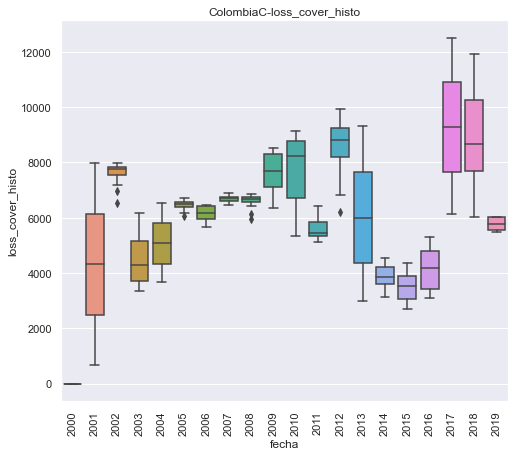

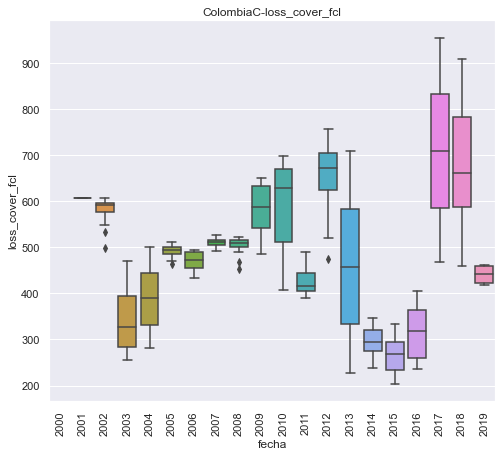

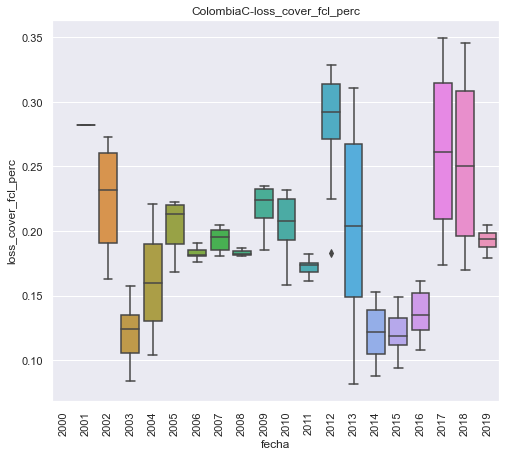

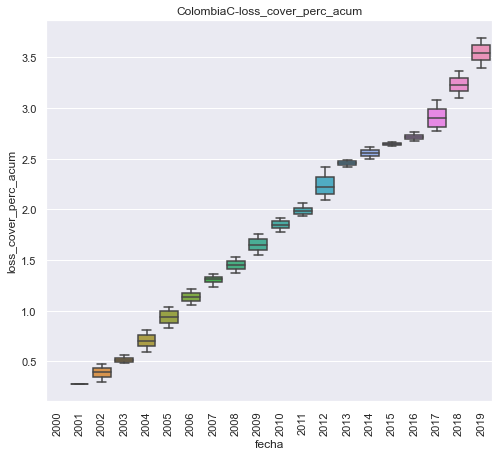

In [42]:
drawBoxPlot(df.reset_index().groupby('fecha')[cols_simple].max(), 'ColombiaC', graph_cuenca_output, 'Y')

..\explore\images\boxplot\monthly\cuenca-bp-mes-PTPM_CON_max-27-fill.png
..\explore\images\boxplot\monthly\cuenca-bp-mes-PTPM_CON_median-27-fill.png
..\explore\images\boxplot\monthly\cuenca-bp-mes-PTPM_CON_min-27-fill.png
..\explore\images\boxplot\monthly\cuenca-bp-mes-Q_MEDIA_D_median-27-fill.png
..\explore\images\boxplot\monthly\cuenca-bp-mes-Q_MN_D_min-27-fill.png
..\explore\images\boxplot\monthly\cuenca-bp-mes-Q_MX_D_max-27-fill.png
..\explore\images\boxplot\monthly\cuenca-bp-mes-TMN_CON_min-27-fill.png
..\explore\images\boxplot\monthly\cuenca-bp-mes-TMX_CON_max-27-fill.png
..\explore\images\boxplot\monthly\cuenca-bp-mes-PTPM_CON_max-28-fill.png
..\explore\images\boxplot\monthly\cuenca-bp-mes-PTPM_CON_median-28-fill.png
..\explore\images\boxplot\monthly\cuenca-bp-mes-PTPM_CON_min-28-fill.png
..\explore\images\boxplot\monthly\cuenca-bp-mes-Q_MEDIA_D_median-28-fill.png
..\explore\images\boxplot\monthly\cuenca-bp-mes-Q_MN_D_min-28-fill.png
..\explore\images\boxplot\monthly\cuenca-bp-m

<ipython-input-20-8851af9225a8>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


..\explore\images\boxplot\monthly\cuenca-bp-mes-Q_MX_D_max-30-fill.png
..\explore\images\boxplot\monthly\cuenca-bp-mes-TMN_CON_min-30-fill.png
..\explore\images\boxplot\monthly\cuenca-bp-mes-TMX_CON_max-30-fill.png
..\explore\images\boxplot\monthly\cuenca-bp-mes-PTPM_CON_max-36-fill.png


<ipython-input-20-8851af9225a8>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


..\explore\images\boxplot\monthly\cuenca-bp-mes-PTPM_CON_median-36-fill.png
..\explore\images\boxplot\monthly\cuenca-bp-mes-PTPM_CON_min-36-fill.png


<ipython-input-20-8851af9225a8>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
<ipython-input-20-8851af9225a8>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


..\explore\images\boxplot\monthly\cuenca-bp-mes-Q_MEDIA_D_median-36-fill.png
..\explore\images\boxplot\monthly\cuenca-bp-mes-Q_MN_D_min-36-fill.png


<ipython-input-20-8851af9225a8>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
<ipython-input-20-8851af9225a8>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


..\explore\images\boxplot\monthly\cuenca-bp-mes-Q_MX_D_max-36-fill.png
..\explore\images\boxplot\monthly\cuenca-bp-mes-TMN_CON_min-36-fill.png
..\explore\images\boxplot\monthly\cuenca-bp-mes-TMX_CON_max-36-fill.png


<ipython-input-20-8851af9225a8>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


..\explore\images\boxplot\monthly\cuenca-bp-mes-PTPM_CON_max-42-fill.png
..\explore\images\boxplot\monthly\cuenca-bp-mes-PTPM_CON_median-42-fill.png


<ipython-input-20-8851af9225a8>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
<ipython-input-20-8851af9225a8>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


..\explore\images\boxplot\monthly\cuenca-bp-mes-PTPM_CON_min-42-fill.png
..\explore\images\boxplot\monthly\cuenca-bp-mes-Q_MEDIA_D_median-42-fill.png


<ipython-input-20-8851af9225a8>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
<ipython-input-20-8851af9225a8>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


..\explore\images\boxplot\monthly\cuenca-bp-mes-Q_MN_D_min-42-fill.png
..\explore\images\boxplot\monthly\cuenca-bp-mes-Q_MX_D_max-42-fill.png


<ipython-input-20-8851af9225a8>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
<ipython-input-20-8851af9225a8>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


..\explore\images\boxplot\monthly\cuenca-bp-mes-TMN_CON_min-42-fill.png
..\explore\images\boxplot\monthly\cuenca-bp-mes-TMX_CON_max-42-fill.png
..\explore\images\boxplot\monthly\cuenca-bp-mes-PTPM_CON_max-44-fill.png


<ipython-input-20-8851af9225a8>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
<ipython-input-20-8851af9225a8>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


..\explore\images\boxplot\monthly\cuenca-bp-mes-PTPM_CON_median-44-fill.png
..\explore\images\boxplot\monthly\cuenca-bp-mes-PTPM_CON_min-44-fill.png


<ipython-input-20-8851af9225a8>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


..\explore\images\boxplot\monthly\cuenca-bp-mes-Q_MEDIA_D_median-44-fill.png
..\explore\images\boxplot\monthly\cuenca-bp-mes-Q_MN_D_min-44-fill.png


<ipython-input-20-8851af9225a8>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
<ipython-input-20-8851af9225a8>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


..\explore\images\boxplot\monthly\cuenca-bp-mes-Q_MX_D_max-44-fill.png
..\explore\images\boxplot\monthly\cuenca-bp-mes-TMN_CON_min-44-fill.png


<ipython-input-20-8851af9225a8>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
<ipython-input-20-8851af9225a8>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


..\explore\images\boxplot\monthly\cuenca-bp-mes-TMX_CON_max-44-fill.png


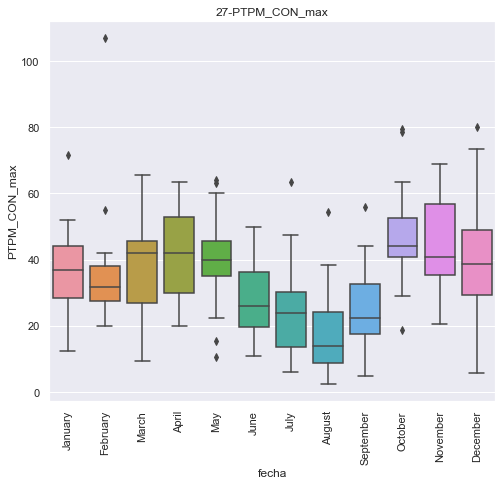

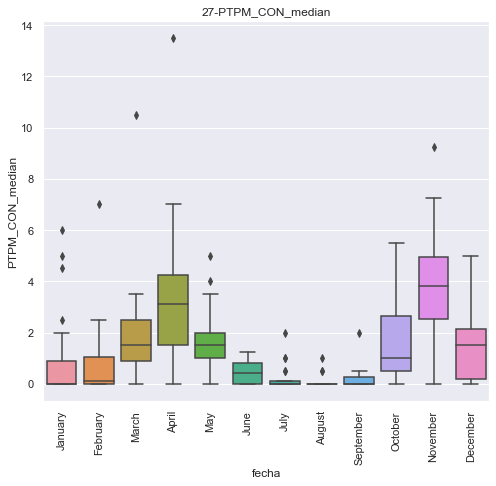

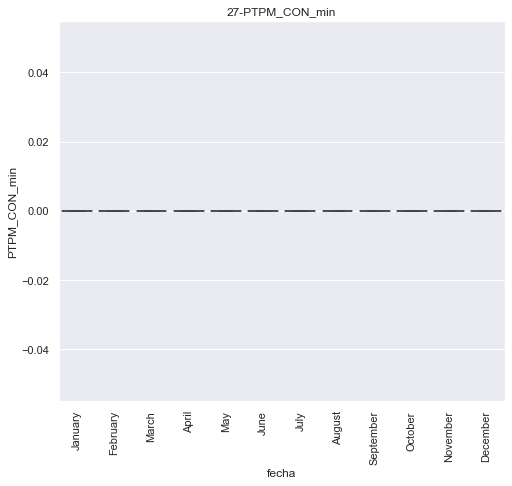

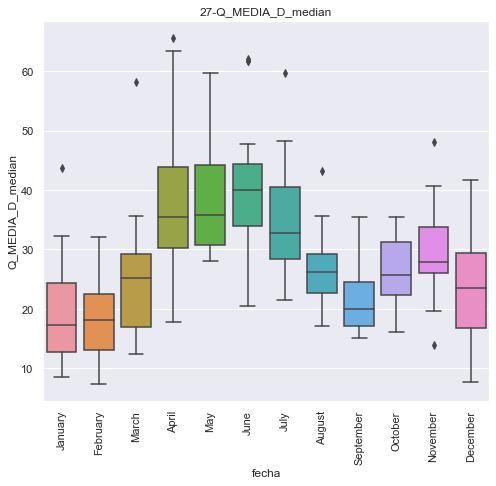

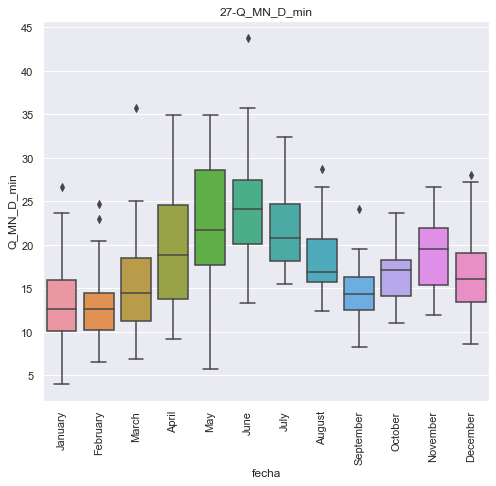

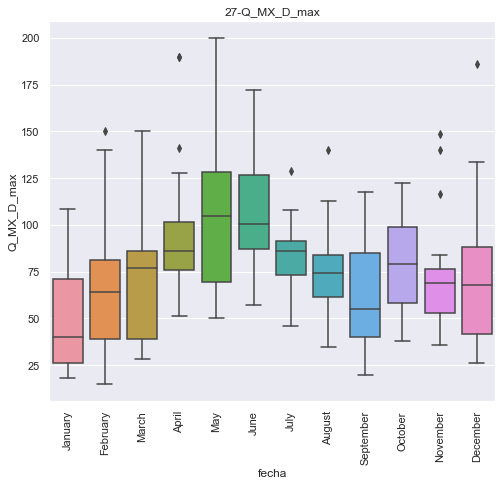

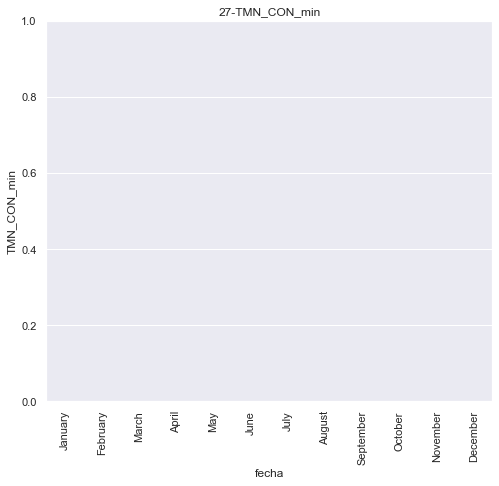

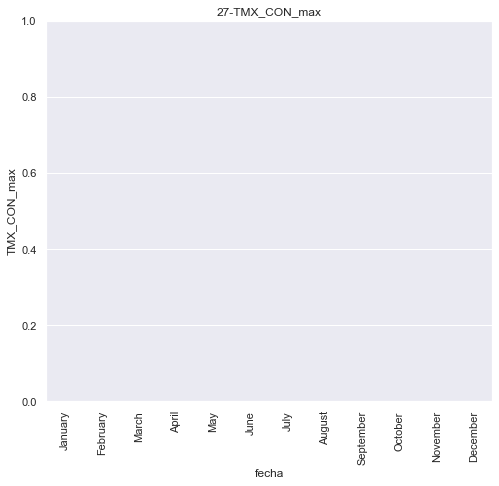

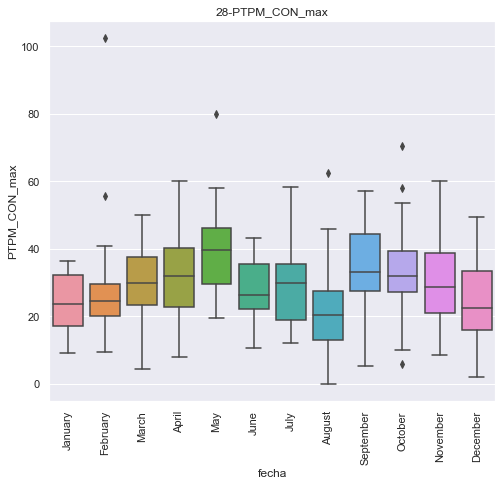

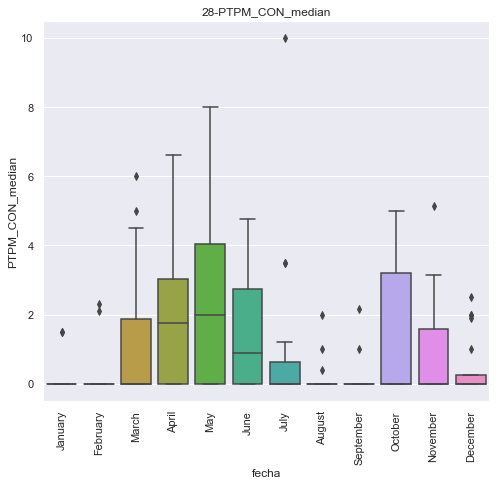

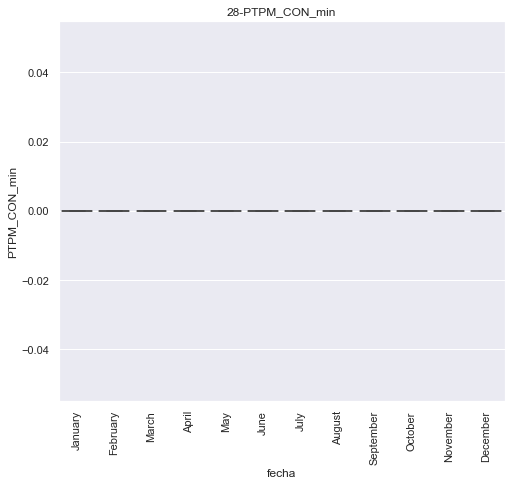

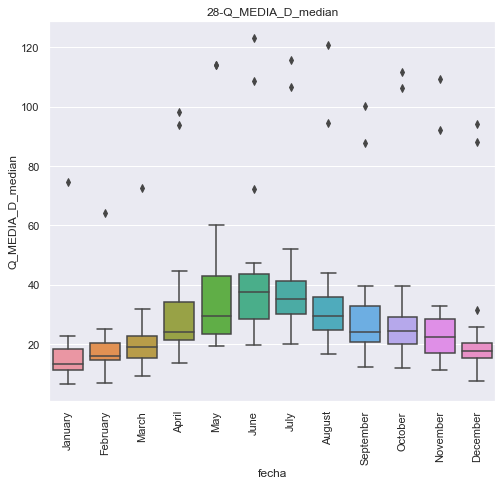

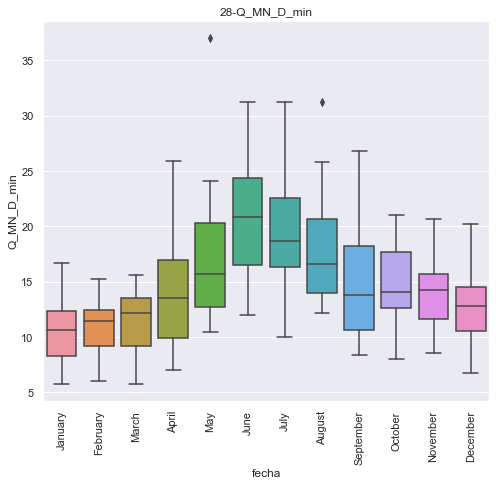

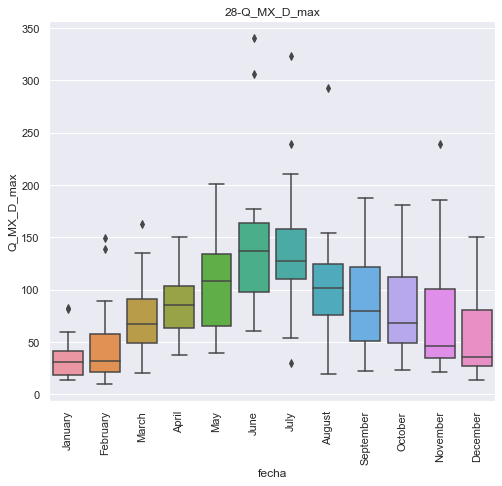

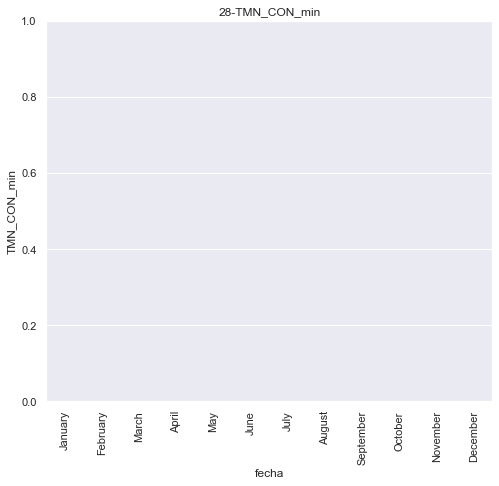

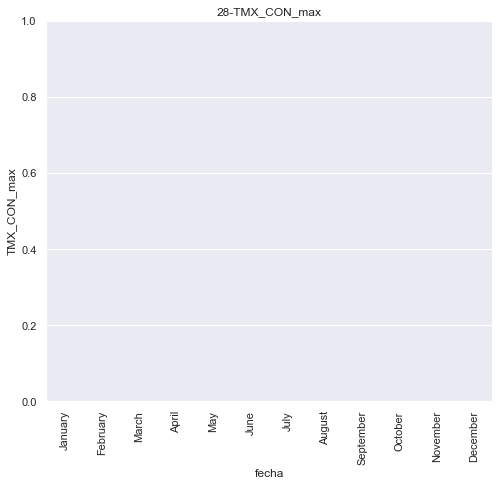

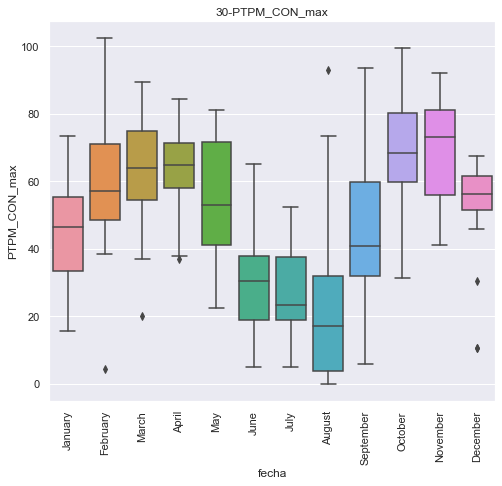

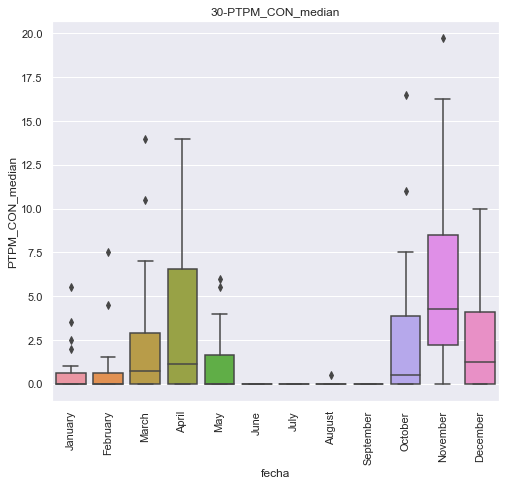

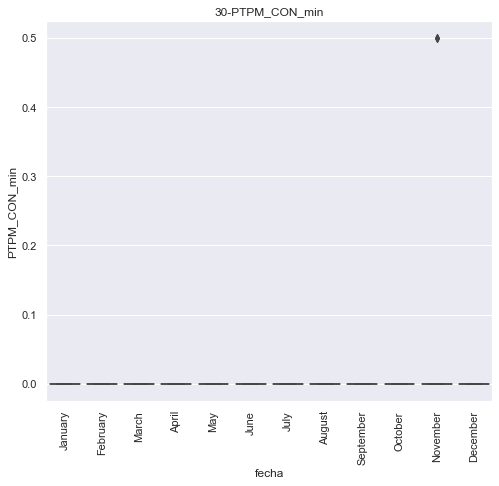

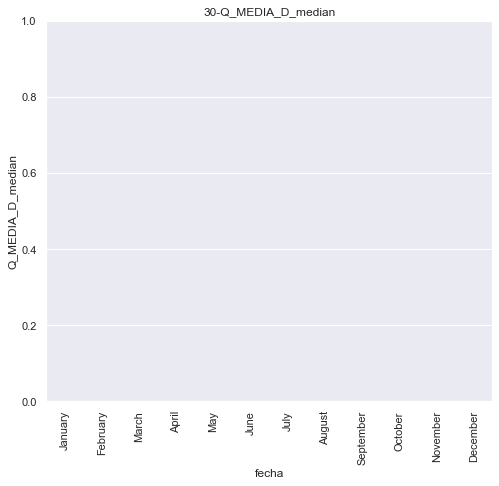

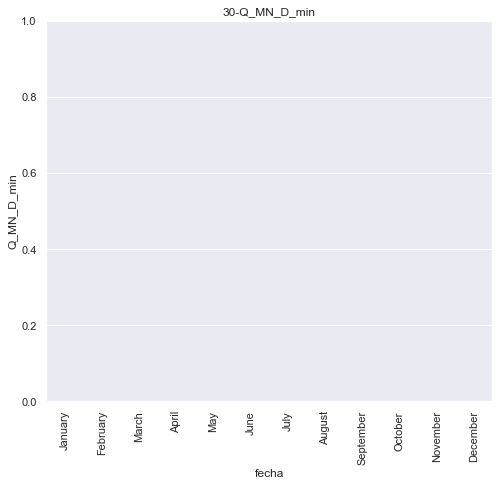

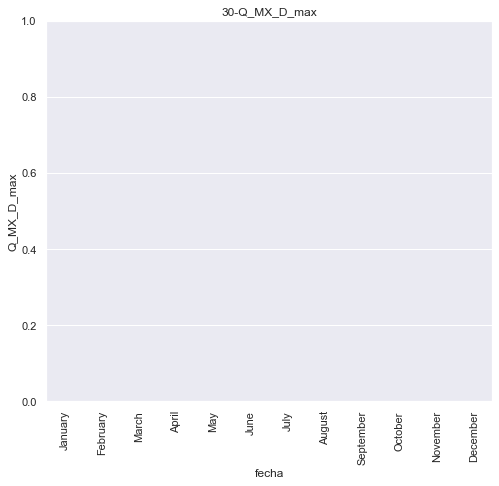

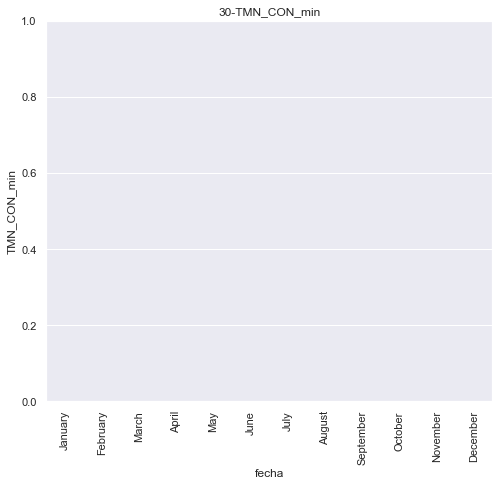

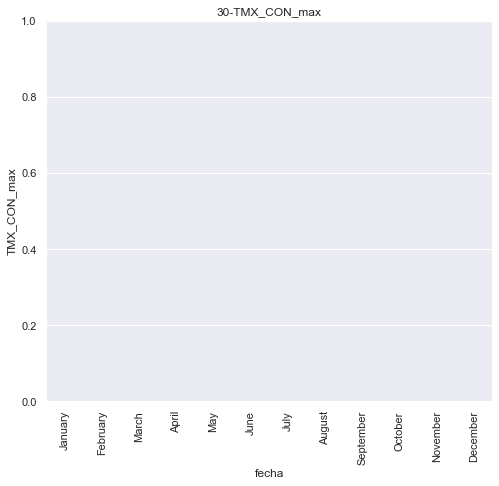

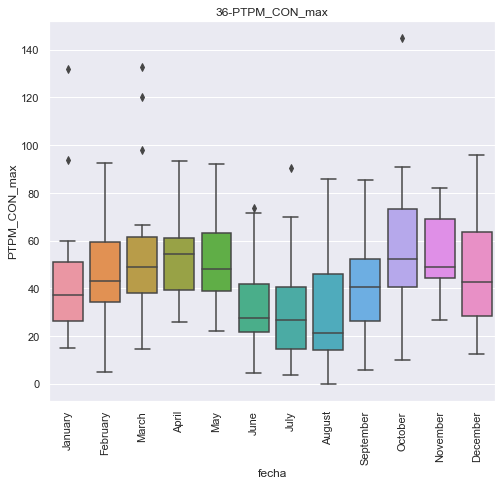

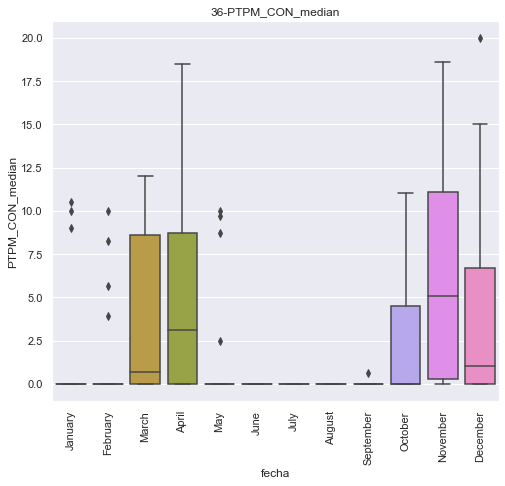

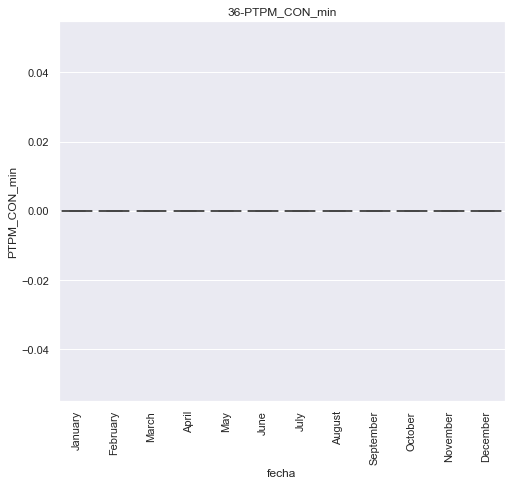

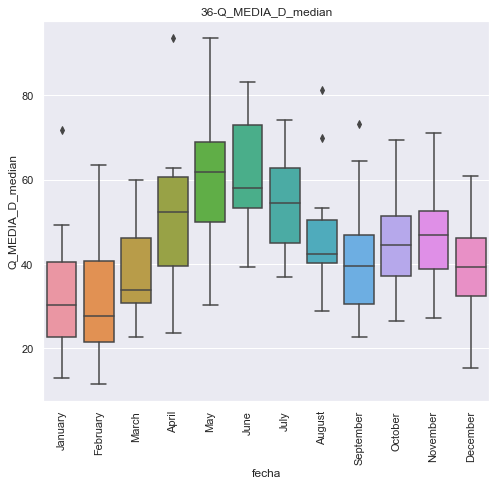

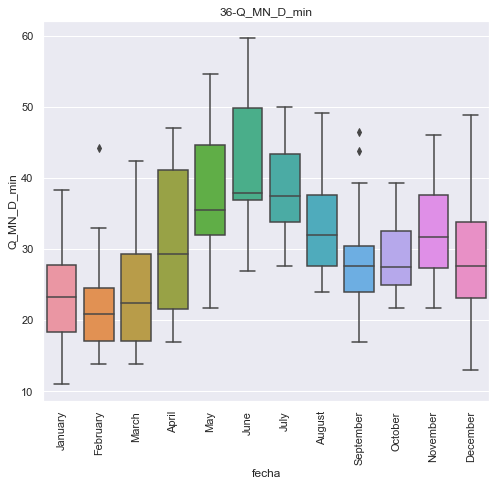

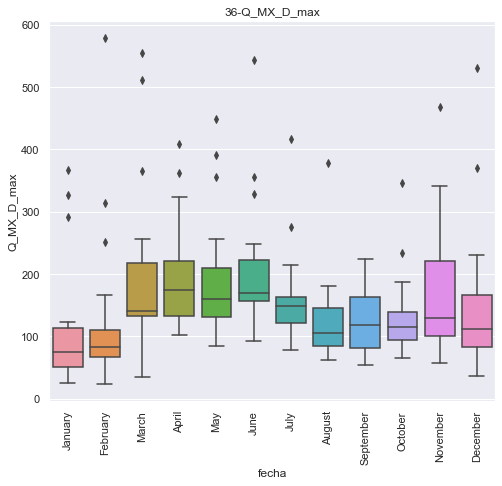

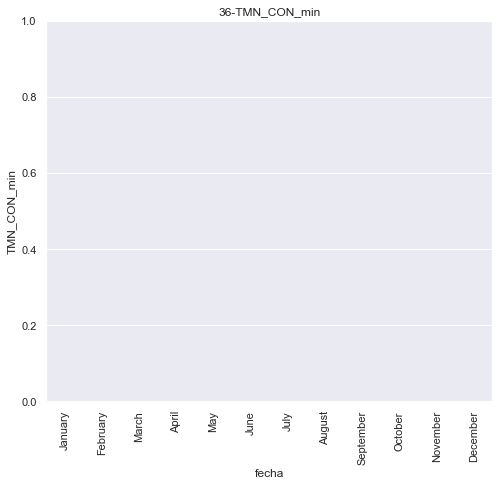

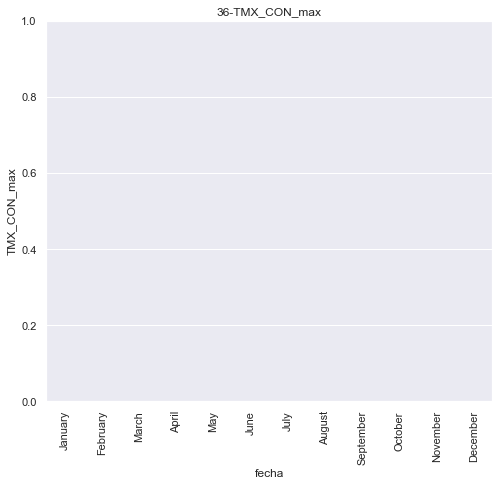

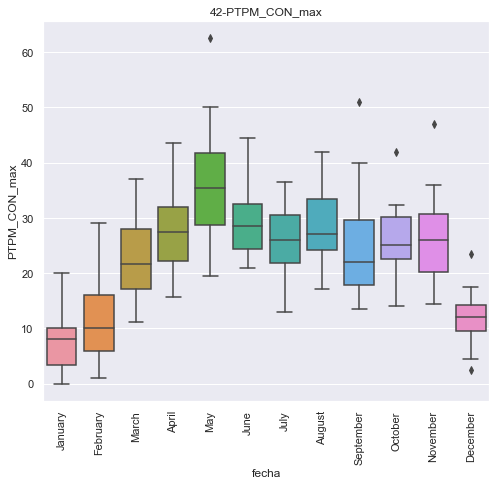

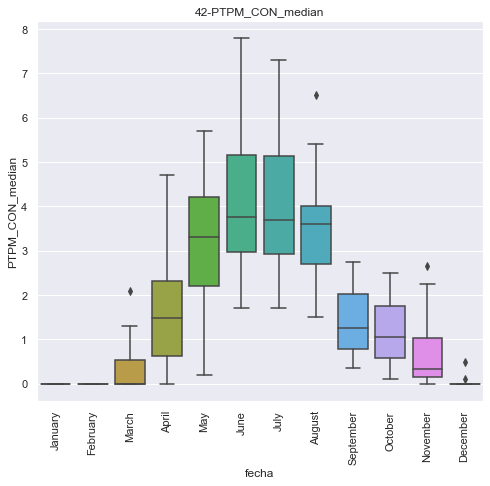

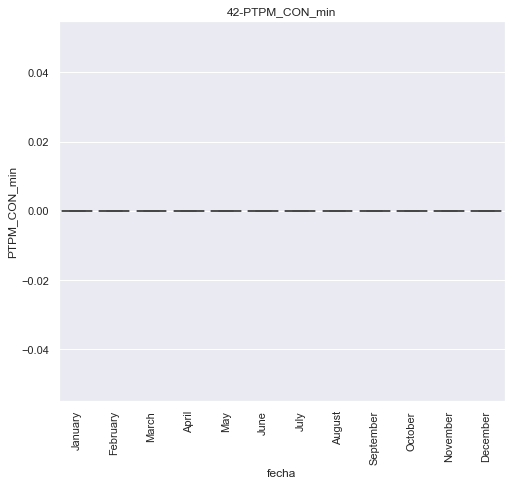

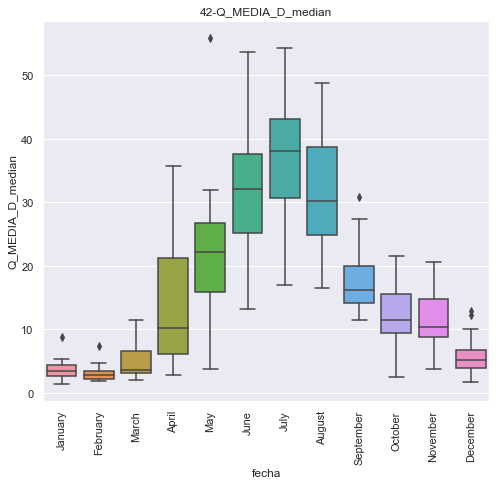

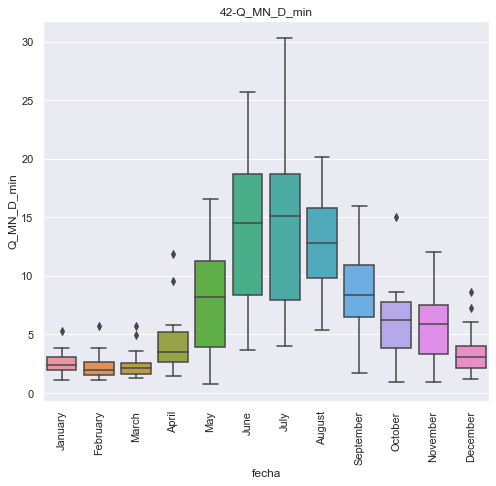

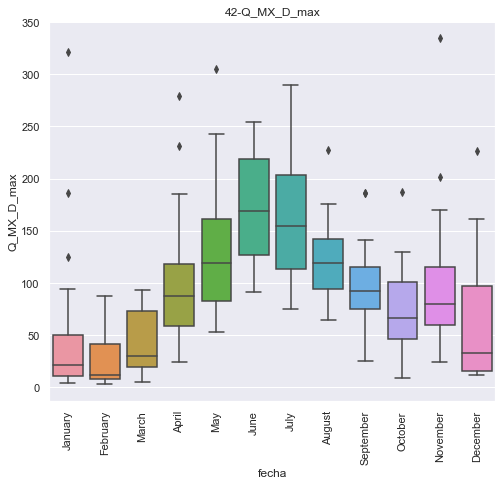

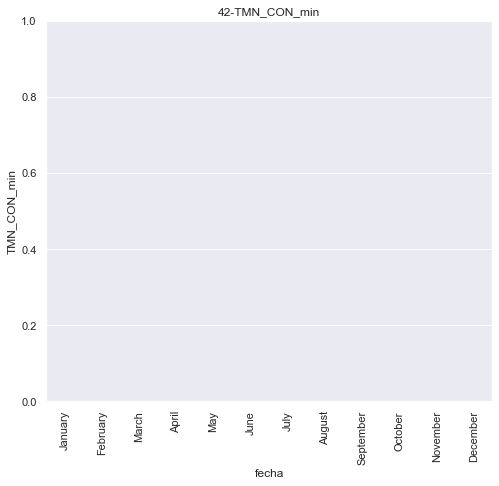

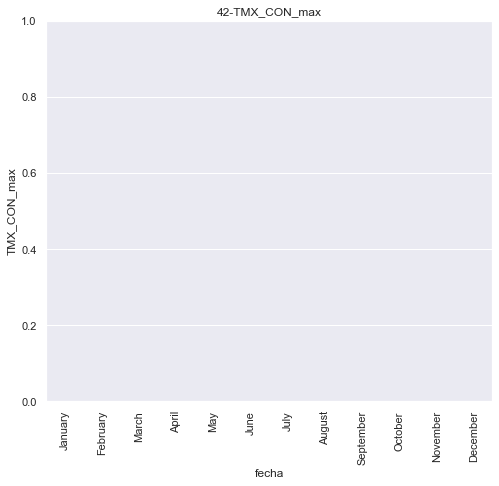

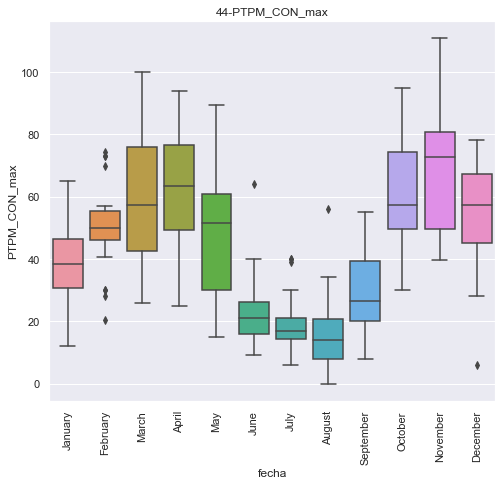

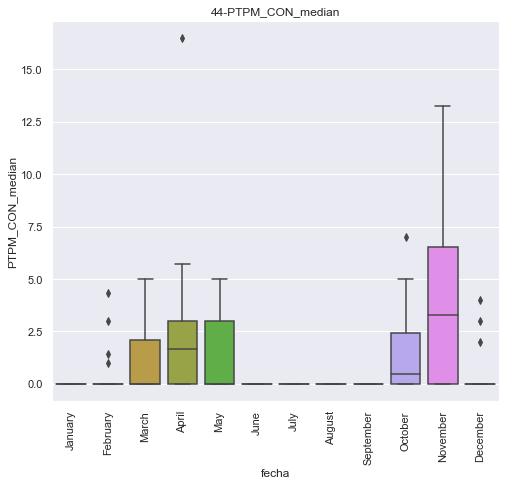

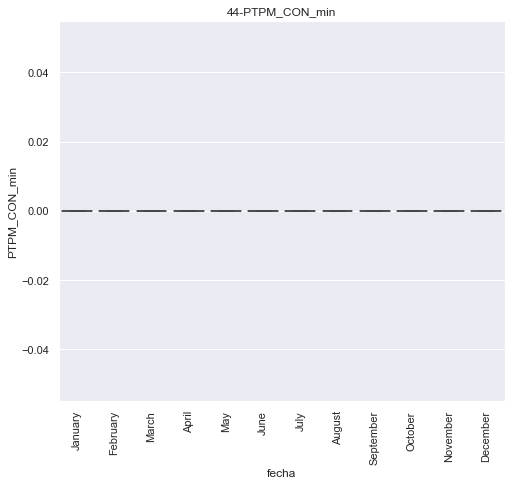

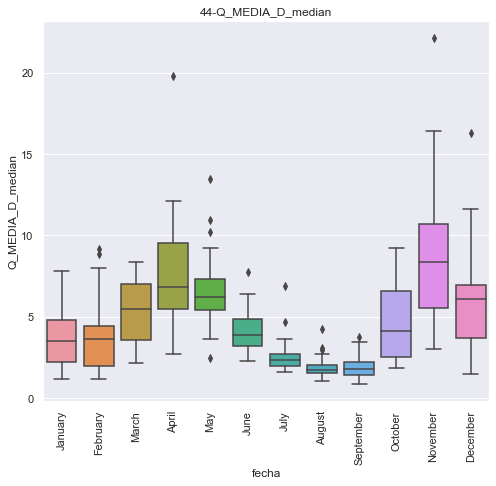

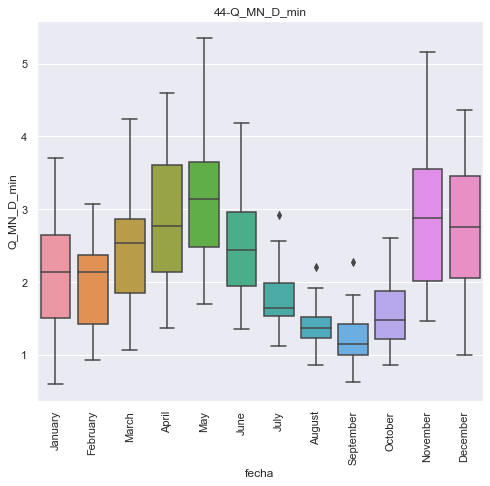

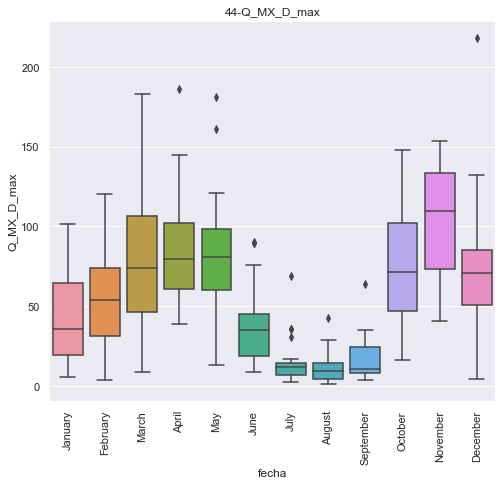

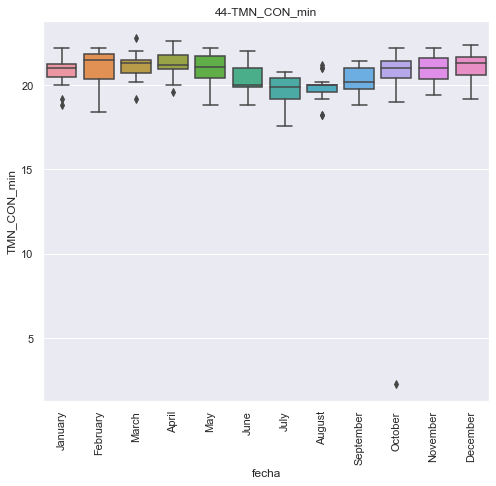

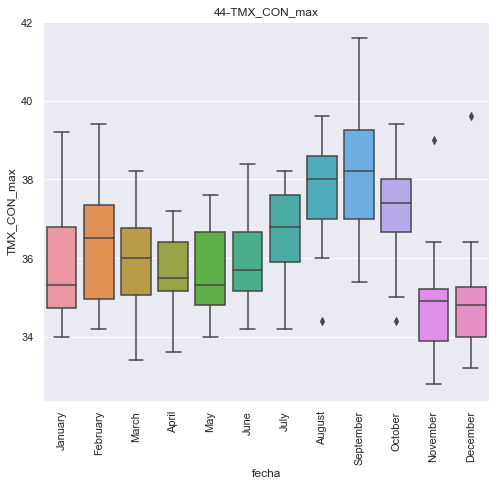

In [24]:
#for c in df.index.levels[0]:
for c in cuencas:
    drawBoxPlot(df.loc[c,cols_by_month], c, graph_cuenca_output, 'M')